In [3]:
import numpy as np
import pandas as pd

In [7]:
df= pd.read_json(r"C:\Users\vipul\Downloads\archive (3)\script-bag-of-words.json")

In [9]:
df.head()

,episodeAlt,seasonNum,episodeNum,episodeTitle,text
0,S1E1,1,1,Winter Is Coming,"[{'text': 'Easy, boy.', 'name': 'Will'}, {'tex..."
1,S1E2,1,2,The Kingsroad,"[{'text': 'And You child... drink, eat. need t..."
2,S1E3,1,3,Lord Snow,[{'text': 'Council. Grand Lord Maester Pycelle...
3,S1E4,1,4,"Cripples, Bastards, and Broken Things",[{'text': 'Lord's The again. been dreaming lit...
4,S1E5,1,5,The Wolf and the Lion,[{'text': 'Does Hugh Ser any capital? family h...


In [11]:
df.iloc[-1]['text']

[{'name': 'Tyrion Lannister', 'text': "I'll find later. you"},
 {'name': 'Jon Snow', 'text': "It's Let me men not safe. send some with you."},
 {'name': 'Tyrion Lannister', 'text': "I'm alone. going"},
 {'name': 'Grey Worm',
  'text': 'Daenerys I In Queen, Targaryen, die. name of one sentence the the to true you'},
 {'name': 'Jon Snow',
  'text': "Grey It's These Worm! are men over. prisoners."},
 {'name': 'Grey Worm',
  'text': "It Queen's are defeated. enemies is not over the until"},
 {'name': 'Davos Seaworth',
  'text': "How They're be? defeated do knees. more much on their them to want you"},
 {'name': 'Grey Worm', 'text': 'They are breathing.'},
 {'name': 'Davos Seaworth', 'text': 'Look We around friend. won. you,'},
 {'name': 'Grey Worm', 'text': "I commands, my not obey queen's yours."},
 {'name': 'Jon Snow', 'text': "And Queen's are commands? the what"},
 {'name': 'Grey Worm',
  'text': '"Kill Cersei Lannister." These They all are chose fight follow for free her. men. to who'}

In [13]:
dialouge = {}
for index, row in df.iterrows():
    for item in row['text']:
        if item['name'] in dialouge:
            # append
            dialouge[item['name']] = dialouge[item['name']] + item['text']
        else:
            # create character
            dialouge[item['name']] = item['text'] + " "

In [15]:
len(dialouge)

817

In [17]:
new_df = pd.DataFrame()
new_df['character'] = dialouge.keys()
new_df['words'] = dialouge.values()

In [19]:
new_df.head()

,character,words
0,Will,"Easy, boy. I've I've Wildlings a a do ever in ..."
1,Waymar Royce,One They're What a and another before d'you ea...
2,Gared,Wall. We back head should the to Our They We W...
3,Jon Snow,Father's Go on. watching. And mother. yourBran...
4,Septa Mordane,"Fine Well always. as done. work, I Quite beaut..."


In [21]:
new_df['num_words'] = new_df['words'].apply(lambda x:len(x.split()))

In [23]:
new_df = new_df.sort_values('num_words',ascending=False)

In [25]:
new_df= new_df.head(150)

In [27]:
print(new_df.shape)
new_df.head()

(150, 3)


,character,words,num_words
17,Tyrion Lannister,It Mmh. Northern about girls. is say the they ...,25924
13,Cersei Lannister,And And Casterly One Rock. When about afraid. ...,14294
3,Jon Snow,Father's Go on. watching. And mother. yourBran...,11488
20,Daenerys Targaryen,We've a and anything. asked been for for guest...,11202
12,Jaime Lannister,"As I It's brother, duty feel it's much. my sho...",10823


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

In [31]:
embeddings = cv.fit_transform(new_df['words']).toarray()

In [33]:
print(embeddings.shape)

(150, 16225)


In [35]:
embeddings = embeddings.astype('float64')

In [37]:
from sklearn.manifold import TSNE

In [39]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(embeddings)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.004s...
[t-SNE] Computed neighbors for 150 samples in 0.686s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 8.446655
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.383209
[t-SNE] KL divergence after 800 iterations: 0.520230


In [41]:
z.shape

(150, 2)

In [43]:
new_df['x'] = z.T[0]
new_df['y'] = z.T[1]

In [45]:
new_df

,character,words,num_words,x,y
17,Tyrion Lannister,It Mmh. Northern about girls. is say the they ...,25924,-1.492993,5.126384
13,Cersei Lannister,And And Casterly One Rock. When about afraid. ...,14294,-1.486942,4.897776
3,Jon Snow,Father's Go on. watching. And mother. yourBran...,11488,-1.290652,4.814851
20,Daenerys Targaryen,We've a and anything. asked been for for guest...,11202,-1.755230,4.409145
12,Jaime Lannister,"As I It's brother, duty feel it's much. my sho...",10823,-1.394697,4.736664
...,...,...,...,...,...
54,Rakharo,"Hash Khaleesi? addrivat mae, shafka zali zhey ...",174,1.683645,-5.158489
184,Lannister Soldier #3,Bring about! her Come You You're a be cold gon...,165,0.628235,-2.780954
324,Black Walder Rivers,But King North The and are bandits. come. craw...,159,0.536279,-2.642677
247,Rattleshirt,Don't I already crow. got need one two. Gut Ha...,157,0.300764,-2.512382


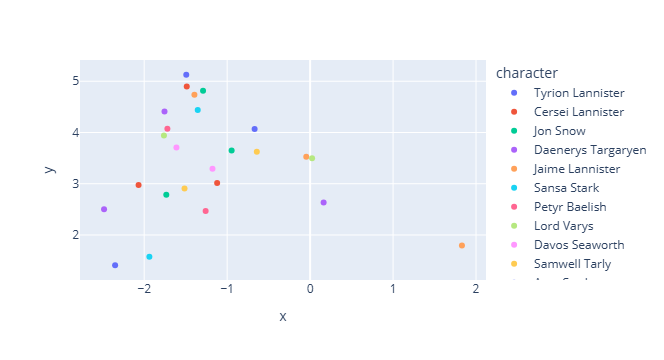

In [49]:
import plotly.express as px
fig = px.scatter(new_df.head(25), x="x", y="y", color="character")
fig.show()

In [83]:
import pickle
with open('data.pkl', 'wb') as f:
    pickle.dump(new_df, f)

In [69]:
import requests

In [71]:
api_data = requests.get("https://thronesapi.com/api/v2/Characters").json()
with open('data.pkl', 'rb') as f:
    df = pickle.load(f)

In [73]:
print(df.columns)

Index(['character', 'words', 'num_words', 'x', 'y'], dtype='object')


In [75]:
df = df.head(25)
df['character'] = df['character'].str.replace('Jaime','Jamie')

selected_character = 'Jon Snow'  

def fetch_image(name, api_data):
    for item in api_data:
        if item['fullName'] == name:
            return item['imageUrl']

character_id = np.where(df['character'].values == selected_character)[0][0]
x = df[['x','y']].values
distances = [np.linalg.norm(x[character_id] - x[i]) for i in range(len(x))]
recommended_id = sorted(list(enumerate(distances)), key=lambda x:x[1])[1][0]
recommended_character = df['character'].values[recommended_id]

print("Selected:", selected_character)
print("Recommended:", recommended_character)
print("Image URL:", fetch_image(recommended_character, api_data))

Selected: Jon Snow
Recommended: Jamie Lannister
Image URL: https://thronesapi.com/assets/images/jaime-lannister.jpg


####  NOTE: To run this Streamlit app, open your command prompt (CMD) or terminal and run:
#### streamlit run matcher.py
####  This will launch the web app in your default browser at http://localhost:8501
